In [1]:
import cv2

src = cv2.imread("sun.jpg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)
canny = cv2.Canny(src, 10, 255)

cv2.imshow("sobel", sobel)
cv2.imshow("laplacian", laplacian)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import cv2

src = cv2.imread("sun.jpg", cv2.IMREAD_COLOR)
dst = cv2.blur(src, (2, 2), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 캠에 블러
capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    
    dst = cv2.blur(frame, (10, 10), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
    cv2.imshow("VideoFrame", dst)

capture.release()
cv2.destroyAllWindows()

In [12]:
#캠에 캐니
capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    
    canny = cv2.Canny(frame, 50, 200)
    cv2.imshow("VideoFrame", canny)

capture.release()
cv2.destroyAllWindows()

In [3]:
capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
src = cv2.imread("sun.jpg", cv2.IMREAD_COLOR)


while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    src = cv2.resize(src, (frame.shape[1], frame.shape[0]))
    combined = cv2.addWeighted(frame, 0.2, src, 0.8, 0)
    cv2.imshow("VideoFrame", combined)

capture.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

src = np.zeros((768, 1366, 3), dtype=np.uint8)

src = cv2.line(src, (100, 100), (1200, 100), (0, 0, 255), 3, cv2.LINE_AA)
src = cv2.line(src, (100, 150), (1200, 150), (0, 255, 255), 3, cv2.LINE_4)

src = cv2.circle(src, (300, 300), 50, (0, 255, 0), cv2.FILLED, cv2.LINE_4)
src = cv2.rectangle(src, (500, 200), (1000, 400), (255, 0, 0), 5, cv2.LINE_8)
src = cv2.ellipse(src, (1200, 300), (100, 50), 0, 90, 180, (255, 255, 0), 2)

pts1 = np.array([[100, 500], [300, 500], [200, 600]])
pts2 = np.array([[600, 500], [800, 500], [700, 600]])
src = cv2.polylines(src, [pts1], True, (0, 255, 255), 2)
src = cv2.fillPoly(src, [pts2], (255, 0, 255), cv2.LINE_AA)

src = cv2.putText(src, "Hi,OpenCV", (900, 600), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 255, 255), 3)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

img = np.zeros(shape = (512, 512, 3), dtype = np.uint8) + 255

x1, x2 = 100, 400
y1, y2 = 100, 400
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255))

pt1 = 120, 50
pt2 = 300, 500
cv2.line(img, pt1, pt2, (255, 0, 0), 2)

imgRect = (x1, y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, pt1, pt2)
if retval:
    cv2.circle(img, rpt1, radius=5, color = (0, 255, 0),thickness=-1)
    cv2.circle(img, rpt2, radius=5, color=(0, 255, 0), thickness=-1)

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
#얼굴 인식

import cv2

capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 인식을 위해 얼굴 검출기를 로드합니다.
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 이미지에서 얼굴을 검출합니다.
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 검출된 얼굴 주위에 사각형을 그립니다.
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5, cv2.LINE_8)
        cv2.putText(frame, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("VideoFrame", frame)

capture.release()
cv2.destroyAllWindows()



In [16]:
#한글 출력
from PIL import ImageFont, ImageDraw, Image

def pilPutText(src, text, pos, font_size, font_color):
    img_pil = Image.fromarray(src)
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype("fonts/gulim.ttc", font_size)
    draw.text(pos, text, font=font, fill=font_color)
    return np.array(img_pil)

img = np.zeros((480, 640, 3), dtype=np.uint8)
img = pilPutText(img, "안녕", (30, 30), 30, (0, 255, 255))

cv2.imshow("text", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#비디오 캡쳐, 녹화
import datetime
import cv2

capture = cv2.VideoCapture("sample_1280x720_surfing_with_audio.avi")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
record = False

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)-1):
        capture.open("./deeplearning/opencv/sample_1280x720_surfing_with_audio.avi")

    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(33)

    if key == 27: #ESC
        break
    elif key == ord('c'):
        print("캡쳐")
        cv2.imwrite("C:/Users/gamec/Downloads/" + str(now) + ".png", frame)
    elif key == ord('r'):
        print("녹화 시작")
        record = True
        video = cv2.VideoWriter("C:/Users/gamec/Downloads/" + str(now) + ".avi", fourcc, 20.0, (frame.shape[1], frame.shape[0]))
    elif key == ord('s'):
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

In [3]:
#캠화면 캡쳐, 녹화
import cv2
import datetime

capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
record = False

# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    # if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)-1):
    #     capture.open("./deeplearning/opencv/sample_1280x720_surfing_with_audio.avi")
    ret, frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 인식을 위해 얼굴 검출기를 로드합니다.
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 이미지에서 얼굴을 검출합니다.
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 검출된 얼굴 주위에 사각형을 그립니다.
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5, cv2.LINE_8)
        cv2.putText(frame, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(100)

    if key == 27: #ESC
        break
    elif key == ord('c'):
        print("캡쳐")
        cv2.imwrite("C:/Users/ppjj2/Downloads/" + str(now) + ".png", frame)
    elif key == ord('r'):
        print("녹화 시작")
        record = True
        video = cv2.VideoWriter("C:/Users/ppjj2/Downloads/" + str(now) + ".avi", fourcc, 40.0, (frame.shape[1], frame.shape[0]))
    elif key == ord('s'):
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

녹화 시작
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중지


In [5]:
#도화지에 마우스로 원 찍기
import cv2
import numpy as np

def mouse_event(event, x, y, flags, param):
    print("event x y flags", event, x, y, flags)
    diff = 2
    global radius
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(param, (x, y), radius, (255, 0, 0), 2)
        cv2.imshow("draw", src)

    elif event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:
            radius += diff
        elif radius > 1:
            radius -= diff

radius = 5
src = np.full((500, 500, 3), 255, dtype=np.uint8)

cv2.imshow("draw", src)
cv2.setMouseCallback("draw", mouse_event, src)
cv2.waitKey()
cv2.destroyAllWindows()

event x y flags 0 245 87 0
event x y flags 0 245 87 0
event x y flags 0 245 87 0
event x y flags 0 247 87 0
event x y flags 0 250 89 0
event x y flags 0 252 91 0
event x y flags 0 258 96 0
event x y flags 0 264 104 0
event x y flags 0 272 114 0
event x y flags 0 282 127 0
event x y flags 0 294 141 0
event x y flags 0 303 157 0
event x y flags 0 312 173 0
event x y flags 0 318 184 0
event x y flags 0 322 195 0
event x y flags 0 324 204 0
event x y flags 0 324 209 0
event x y flags 0 324 219 0
event x y flags 0 322 226 0
event x y flags 0 320 233 0
event x y flags 0 317 238 0
event x y flags 0 314 244 0
event x y flags 0 312 248 0
event x y flags 0 309 251 0
event x y flags 0 309 253 0
event x y flags 0 307 254 0
event x y flags 0 306 256 0
event x y flags 0 304 257 0
event x y flags 0 304 258 0
event x y flags 0 303 258 0
event x y flags 0 302 258 0
event x y flags 10 302 258 -7864320
event x y flags 10 302 258 -7864320
event x y flags 10 302 258 -7864320
event x y flags 10 302 258 -786

In [7]:
import cv2
history = []
radius = 5
capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
def mouse_event(event, x, y, flags, param):
    print("event x y flags", event, x, y, flags)
    diff = 2
    global radius
    
    if event == cv2.EVENT_RBUTTONDOWN:
        history.append((x, y))

    elif event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:
            radius += diff
        elif radius > 1:
            radius -= diff

cv2.namedWindow('VideoFrame')
cv2.setMouseCallback("VideoFrame", mouse_event, frame)

while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    for x,y in history:
        cv2.circle(frame, (x, y), radius, (255, 0, 0), 2)
    cv2.imshow("VideoFrame", frame)

capture.release()
cv2.destroyAllWindows()

event x y flags 0 42 197 0
event x y flags 0 68 199 0
event x y flags 0 141 199 0
event x y flags 0 163 199 0
event x y flags 0 207 199 0
event x y flags 0 221 199 0
event x y flags 0 235 199 0
event x y flags 0 263 199 0
event x y flags 0 267 199 0
event x y flags 2 267 199 2
event x y flags 5 267 199 0
event x y flags 0 267 199 0
event x y flags 0 265 199 0
event x y flags 0 259 199 0
event x y flags 0 249 199 0
event x y flags 0 237 196 0
event x y flags 0 217 190 0
event x y flags 0 170 182 0
event x y flags 0 161 181 0
event x y flags 0 159 181 0
event x y flags 2 159 181 2
event x y flags 5 159 181 0
event x y flags 0 158 180 0
event x y flags 0 159 176 0
event x y flags 0 161 170 0
event x y flags 0 162 167 0
event x y flags 0 168 158 0
event x y flags 0 169 154 0
event x y flags 0 174 145 0
event x y flags 0 176 143 0
event x y flags 0 180 137 0
event x y flags 0 181 135 0
event x y flags 2 181 135 2
event x y flags 0 183 135 2
event x y flags 5 183 135 0
event x y flags 0 193 

In [5]:
import cv2

def onChange(pos):
    pass

src = cv2.imread("sun.jpg", cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("Trackbar Windows")

cv2.createTrackbar("threshold", "Trackbar Windows", 0, 255, onChange)
cv2.createTrackbar("maxValue", "Trackbar Windows", 0, 255, lambda x : x)

cv2.setTrackbarPos("threshold", "Trackbar Windows", 127)
cv2.setTrackbarPos("maxValue", "Trackbar Windows", 255)

while cv2.waitKey(1) != ord('q'):

    thresh = cv2.getTrackbarPos("threshold", "Trackbar Windows")
    maxval = cv2.getTrackbarPos("maxValue", "Trackbar Windows")

    _, binary = cv2.threshold(src, thresh, maxval, cv2.THRESH_BINARY)

    cv2.imshow("Trackbar Windows", binary)

cv2.destroyAllWindows()

In [8]:
import cv2

def onChange(pos):
    pass

capture = cv2.VideoCapture(0)



cv2.namedWindow("Trackbar Windows")

cv2.createTrackbar("threshold1", "Trackbar Windows", 0, 255, onChange)
cv2.createTrackbar("threshold2", "Trackbar Windows", 0, 255, lambda x : x)

cv2.setTrackbarPos("threshold1", "Trackbar Windows", 255)
cv2.setTrackbarPos("threshold2", "Trackbar Windows", 255)

while cv2.waitKey(10) < 0:
    ret, frame = capture.read()
    canny = cv2.Canny(frame, 10, 255)

    threshold1 = cv2.getTrackbarPos("threshold1", "Trackbar Windows")
    threshold2 = cv2.getTrackbarPos("threshold2", "Trackbar Windows")

    _, binary = cv2.threshold(canny, threshold1, threshold2, cv2.THRESH_BINARY)

    cv2.imshow("Trackbar Windows", binary)
cv2.destroyAllWindows()

In [12]:
import cv2

src = cv2.imread("sun.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    # print(i, hierarchy[0][i])
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()


In [10]:
import cv2

src = cv2.imread("sun.jpg")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    cv2.circle(dst, tuple(map(int, i[0])), 3, (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

src = cv2.imread("sun.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
result = np.zeros((src.shape[0], 256), dtype=np.uint8)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, result.shape[0], cv2.NORM_MINMAX)

for x, y in enumerate(hist):
    cv2.line(result, (int(x), result.shape[0]), (int(x), result.shape[0] - int(y)), 255)

dst = np.hstack([gray, result])

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

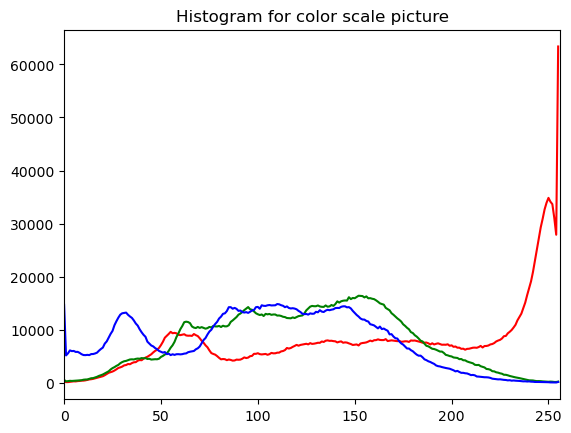

In [4]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
img = cv2.imread('sun.jpg')

# OpenCV에서는 색상 채널 순서가 BGR이므로 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 각 채널별로 히스토그램 계산
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])

plt.title('Histogram for color scale picture')
plt.show()

In [5]:
#모자 같은 거 찾기
import cv2

src = cv2.imread("hats.webp", cv2.IMREAD_GRAYSCALE)
templit = cv2.imread("hat.webp", cv2.IMREAD_GRAYSCALE)
dst = cv2.imread("hats.webp")

result = cv2.matchTemplate(src, templit, cv2.TM_SQDIFF_NORMED)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = minLoc
h, w = templit.shape
print(result)
print(x, y)

dst = cv2.rectangle(dst, (x, y), (x +  w, y + h) , (0, 0, 255), 1)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.35533297 0.35373935 0.35233006 ... 0.38107723 0.38054636 0.38003504]
 [0.35876653 0.3570789  0.35559902 ... 0.37908155 0.37852526 0.37799665]
 [0.36310115 0.36135522 0.35979638 ... 0.37734947 0.37675878 0.3761936 ]
 ...
 [0.33359423 0.33221167 0.33134934 ... 0.5346984  0.52616715 0.51813215]
 [0.3475707  0.34613252 0.34522045 ... 0.5370005  0.528527   0.5205167 ]
 [0.36116964 0.3596826  0.35871062 ... 0.53968567 0.5312418  0.52326816]]
0 301
